In [406]:
import json
from functools import reduce
from statistics import mean

Load data

In [407]:
with open('repoToSteps.json') as repoToSteps:
    repoToStepsCWL = {
        repo: list(filter(lambda step: '.cwl' in step, steps))
        for repo, steps in json.loads(repoToSteps.read()).items()
    }

In [408]:
with open('phenotypeGroups.json') as phenotypeGroups:
    phenotypeGroups = json.loads(phenotypeGroups.read())

In [409]:
with open('intersections.json') as intersections:
    intersections = json.loads(intersections.read())

Condition group statistics

In [410]:
print('\nTotal definitions: ' + str(len(repoToStepsCWL.keys())))


Total definitions: 1171


In [411]:
conditionGroups = phenotypeGroups.keys()
print('\nCondition groups: ' + str(len(conditionGroups)))


Condition groups: 180


In [412]:
groupedConditions = list(phenotypeGroups.keys()) + [
    json.dumps(item) for sublist in phenotypeGroups.values() for item in sublist
]
print('\nGrouped conditions: ' + str(len(groupedConditions)))


Grouped conditions: 706


In [413]:
ungroupedConditions = [
    repo for repo in repoToStepsCWL.keys() if repo not in groupedConditions
]
print(
    '\nUngrouped conditions: '
    + str(
        sorted(
            list(
                set(
                    [
                        json.loads(condition)['"name"'].split('---')[0]
                        for condition in ungroupedConditions
                    ]
                )
            )
        )
    )
)


Ungrouped conditions: ['Abdominal-Hernia', 'Abdominal-Pain', 'Acei-Loop-diuretic', 'Acerbose', 'Acne', 'Actinic-keratosis', 'Acute-Myocardial-Infarction', 'Acute-Nasopharyngitis-Primary-care', 'Acute-Nasopharyngitis-Secondary-care', 'Acute-bronchitis-Biobank', 'Acute-bronchitis-Primary-care', 'Acute-bronchitis-Secondary-care', 'Acute-cutaneous-lupus', 'Affective-Psychotic-Disorders', 'Agranulocytosis', 'Allergic-and-chronic-rhinitis', 'Amiodarone', 'Anal-fissure', 'Anaphylaxis', 'Angiodysplasia-of-colon', 'Angiotensin-Iireceptorantagonists', 'Anorectal-fistula', 'Anorectal-prolapse', 'Anorexia-and-bulimia-nervosa', 'Anterior-and-Intermediate-Uveitis', 'Anticoagulants', 'Antiepileptic', 'Antihypertensive-Drugs', 'Antihypertensive-medication', 'Antihypertensives', 'Antiphospholipid', 'Antiplatelet-Agents', 'Anxiolytic-Hypnotic', 'Any-malignancy-Charlson-primary-care', 'Aplastic-anaemias', 'Arrhythmia', 'Arteritis', 'Asbestosis', 'Aspergillosis-Primary-care', 'Aspergillosis-Secondary-car

In [414]:
print('\nCount of ungrouped conditions: ' + str(len(ungroupedConditions)))


Count of ungrouped conditions: 542


In [415]:
print('\nUnique conditions: ' + str(len(conditionGroups) + len(ungroupedConditions)))


Unique conditions: 722


In [416]:
print(
    '\nProportion of conditions grouped: '
    + str(round(len(groupedConditions) / len(repoToStepsCWL.keys()) * 100, 2))
    + '%'
)


Proportion of conditions grouped: 60.29%


In [417]:
print(
    '\nDefinitions per condition: '
    + str(
        len(repoToStepsCWL.keys()) / (len(conditionGroups) + len(ungroupedConditions))
    )
)


Definitions per condition: 1.6218836565096952


Largest condition group analysis

In [418]:
sortedConditionGroups = sorted(
    [
        (leadCondition, len(otherConditions) + 1)
        for leadCondition, otherConditions in phenotypeGroups.items()
    ],
    key=lambda conditionGroupEntry: conditionGroupEntry[1],
    reverse=True,
)
largestConditionGroup = sortedConditionGroups[0]
print('\nLargest condition group: ' + str(largestConditionGroup))


Largest condition group: ('{"\\"name\\"": "Diabetes---d88be170-16f1-11ef-9de4-4d4ea830ad16", "\\"about\\"": "Diabetes - PH8"}', 45)


In [419]:
print(phenotypeGroups[largestConditionGroup[0]])

[{'"name"': 'Diabetes---4ce31400-16fa-11ef-9de4-4d4ea830ad16', '"about"': 'Diabetes - PH24'}, {'"name"': 'Diabetes---a1f20850-1779-11ef-9de4-4d4ea830ad16', '"about"': 'Diabetes - PH152'}, {'"name"': 'Diabetes-Medication---3541e3f0-1847-11ef-9de4-4d4ea830ad16', '"about"': 'Diabetes Medication - PH374'}, {'"name"': 'Diabetes---87522990-184a-11ef-9de4-4d4ea830ad16', '"about"': 'Diabetes - PH375'}, {'"name"': 'Diabetes---c10cdf70-19eb-11ef-9de4-4d4ea830ad16', '"about"': 'Diabetes - PH518'}, {'"name"': 'Diabetes---f3206ee0-19ec-11ef-9de4-4d4ea830ad16', '"about"': 'Diabetes - PH519'}, {'"name"': 'Diabetes---b8c00ec0-19ee-11ef-9de4-4d4ea830ad16', '"about"': 'Diabetes - PH520'}, {'"name"': 'Diabetes---e53eb430-1a37-11ef-9de4-4d4ea830ad16', '"about"': 'Diabetes - PH580'}, {'"name"': 'Diabetes---1d8a7370-1aaa-11ef-9de4-4d4ea830ad16', '"about"': 'Diabetes - PH618'}, {'"name"': 'Diabetes---cd970470-1ad4-11ef-9de4-4d4ea830ad16', '"about"': 'Diabetes - PH629'}, {'"name"': 'Diabetes-Comorbidities---f

In [420]:
MIN_COMMON_STEPS_FOR_INTERSECTION = 0


def getIntersectingConditions(conditionGroup):
    return set(
        map(
            lambda repo: repo['"name"'],
            reduce(
                lambda allConditionsWithIntersection, conditionsWithIntersection: allConditionsWithIntersection
                + json.loads(conditionsWithIntersection),
                list(
                    dict(
                        filter(
                            lambda conditionPairAndIntersectingSteps: len(
                                conditionPairAndIntersectingSteps[1]
                            )
                            > MIN_COMMON_STEPS_FOR_INTERSECTION,
                            intersections[conditionGroup[0]].items(),
                        )
                    ).keys()
                ),
                [],
            ),
        )
    )

In [421]:
intersectingConditions = getIntersectingConditions(largestConditionGroup)
print(
    '\nIntersecting conditions in largest condition group: '
    + str(intersectingConditions)
)


Intersecting conditions in largest condition group: {'CCU000-Diabetes---01d2fd40-1db7-11ef-94c0-09c4aef33dd3', 'Diabetes---87522990-184a-11ef-9de4-4d4ea830ad16', 'Diabetes-Elixhauser-primary-care---398956f0-1e00-11ef-94c0-09c4aef33dd3', 'Insulin---04bad9e0-1c15-11ef-bdee-f10829e63eeb', 'Dpp4---09d1dab0-19f3-11ef-9de4-4d4ea830ad16', 'Gpl1---8c5dc720-19f6-11ef-9de4-4d4ea830ad16', 'Diabetes---d88be170-16f1-11ef-9de4-4d4ea830ad16', 'Metformin---74b729a0-1cd4-11ef-bdee-f10829e63eeb', 'Diabetes-Charlson-primary-care---c4782000-1df3-11ef-94c0-09c4aef33dd3', 'Glp-1Receptoragonists---20f140a0-1c14-11ef-bdee-f10829e63eeb', 'Diabetes---5845e8e0-1d3a-11ef-94c0-09c4aef33dd3', 'Diabetes---b8c00ec0-19ee-11ef-9de4-4d4ea830ad16', 'Antidiabetic-Medications---c8208cc0-1bbd-11ef-bdee-f10829e63eeb', 'Diabetes---1d8a7370-1aaa-11ef-9de4-4d4ea830ad16', 'CCU002_02-Diabetes---32f22c50-2273-11ef-ba9f-3d1e4076db47', 'Diabetes---a1f20850-1779-11ef-9de4-4d4ea830ad16', 'Sulfonylureas---76fa76a0-1a26-11ef-9de4-4d4ea

In [422]:
print(
    '\nNumber of intersection conditions in largest condition group: '
    + str(len(intersectingConditions))
)


Number of intersection conditions in largest condition group: 45


In [423]:
from util import filterFirstOccurrences

commonStepsInLargestGroup = list(
    map(
        lambda conditionsToCommonSteps: {
            'conditions': json.loads(conditionsToCommonSteps[0]),
            'commonSteps': len(filterFirstOccurrences(conditionsToCommonSteps[1])),
        },
        intersections[largestConditionGroup[0]].items(),
    )
)

Definition pair analysis in largest group

In [424]:
mostCommonStepsInLargestGroup = max(
    commonStepsInLargestGroup,
    key=lambda overlapNumbersEntry: overlapNumbersEntry['commonSteps'],
)

In [425]:
print(
    '\nDefinition pair with most common steps in largest condition group + number of common (+ number of steps (% of which common) in respective workflows): '
    + str(mostCommonStepsInLargestGroup)
    + ' -- '
    + str(
        len(repoToStepsCWL[json.dumps(mostCommonStepsInLargestGroup['conditions'][0])])
    )
    + ' ('
    + str(
        round(
            mostCommonStepsInLargestGroup['commonSteps']
            / len(
                repoToStepsCWL[
                    json.dumps(mostCommonStepsInLargestGroup['conditions'][0])
                ]
            )
            * 100,
            2,
        )
    )
    + '%) '
    + str(
        len(repoToStepsCWL[json.dumps(mostCommonStepsInLargestGroup['conditions'][1])])
    )
    + ' ('
    + str(
        round(
            mostCommonStepsInLargestGroup['commonSteps']
            / len(
                repoToStepsCWL[
                    json.dumps(mostCommonStepsInLargestGroup['conditions'][1])
                ]
            )
            * 100,
            2,
        )
    )
    + '%)'
)


Definition pair with most common steps in largest condition group + number of common (+ number of steps (% of which common) in respective workflows): {'conditions': [{'"name"': 'CCU000-Diabetes---01d2fd40-1db7-11ef-94c0-09c4aef33dd3', '"about"': 'CCU000 Diabetes - PH945'}, {'"name"': 'CCU002_01-Diabetes-and-diabates-medication---a80de070-2204-11ef-ba9f-3d1e4076db47', '"about"': 'CCU002_01 Diabetes and diabates medication - PH965'}], 'commonSteps': 86} -- 95 (90.53%) 95 (90.53%)


In [426]:
print('\nCommon steps between definition pair with most common steps in largest group:')
for line in intersections[largestConditionGroup[0]][
    json.dumps(mostCommonStepsInLargestGroup['conditions'])
]:
    print(line)


Common steps between definition pair with most common steps in largest group:
['retinal-ccu000-diabetes---secondary.cwl', 'renal-ccu002_01-diabetes-and-diabates-medication---primary.cwl']
['neurological-ccu000-diabetes---secondary.cwl', 'neurologic-ccu002_01-diabetes-and-diabates-medication---primary.cwl']
['ccu000-diabetes-leprechaunism---secondary.cwl', 'ccu002_01-diabetes-and-diabates-medication-leprechaunism---primary.cwl']
['stable-ccu000-diabetes---secondary.cwl', 'stable-ccu002_01-diabetes-and-diabates-medication---primary.cwl']
['ccu000-diabetes-vessel---secondary.cwl', 'ccu002_01-diabetes-and-diabates-medication-vessel---primary.cwl']
['ccu000-diabetes-education---secondary.cwl', 'ccu002_01-diabetes-and-diabates-medication-education---primary.cwl']
['neuropathic-ccu000-diabetes---secondary.cwl', 'neuropathic-ccu002_01-diabetes-and-diabates-medication---primary.cwl']
['peripheral-ccu000-diabetes---secondary.cwl', 'peripheral-ccu002_01-diabetes-and-diabates-medication---primary

In [427]:
leastCommonStepsInLargestGroup = min(
    commonStepsInLargestGroup,
    key=lambda overlapNumbersEntry: overlapNumbersEntry['commonSteps'],
)

In [428]:
print('\nLeast common steps in largest group: ' + str(leastCommonStepsInLargestGroup))


Least common steps in largest group: {'conditions': [{'"name"': 'Diabetes---d88be170-16f1-11ef-9de4-4d4ea830ad16', '"about"': 'Diabetes - PH8'}, {'"name"': 'Diabetes---a1f20850-1779-11ef-9de4-4d4ea830ad16', '"about"': 'Diabetes - PH152'}], 'commonSteps': 1}


In [429]:
averageCommonSteps = round(
    mean(list(map(lambda overlap: overlap['commonSteps'], commonStepsInLargestGroup))),
    2,
)

In [430]:
stepLengthsInLargestGroup = [
    (
        len(repoToStepsCWL[largestGroupPhenotype])
        if isinstance(largestGroupPhenotype, str)
        else len(repoToStepsCWL[json.dumps(largestGroupPhenotype)])
    )
    for largestGroupPhenotype in (
        [largestConditionGroup[0]] + phenotypeGroups[largestConditionGroup[0]]
    )
]
print('\nStep lengths in largest group: ' + str(sorted(stepLengthsInLargestGroup)))


Step lengths in largest group: [1, 2, 2, 3, 3, 4, 4, 4, 6, 8, 11, 15, 19, 20, 22, 25, 28, 28, 29, 30, 31, 32, 32, 33, 38, 41, 41, 41, 42, 45, 57, 62, 68, 75, 79, 81, 86, 86, 89, 90, 95, 95, 95, 95, 124]


In [431]:
print(
    '\nAverage common steps in largest group (+ average number of steps (% of which common)): '
    + str(int(averageCommonSteps))
    + ' ('
    + str(int(mean(stepLengthsInLargestGroup)))
    + ' ('
    + str(
        round(
            int(averageCommonSteps) / int(mean(stepLengthsInLargestGroup)) * 100,
            2,
        )
    )
    + '%)'
    + ')'
)


Average common steps in largest group (+ average number of steps (% of which common)): 7 (42 (16.67%))


N largest condition groups analysis in graph form

In [432]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def plotIntersectionInLargestGroups():
    frame = pd.DataFrame(
        [
            [
                str(' '.join(json.loads(key)['"name"'].split('---')[0].split('-'))),
                len(getIntersectingConditions([key, value])),
                value - len(getIntersectingConditions([key, value])),
            ]
            for key, value in list(reversed(sortedConditionGroups[:10]))
        ],
        columns=['Condition Group', 'Intersecting', 'Distinct'],
    )
    frame.plot(x='Condition Group', kind='barh', stacked=True, mark_right=True)
    frameTotal = frame['Intersecting'] + frame['Distinct']
    frameProportions = frame[frame.columns[1:]].div(frameTotal, 0) * 100
    for column in frameProportions:
        for y, (sumWithPrecedingColumns, originalFrameValue, proportion) in enumerate(
            zip(
                frame.iloc[:, 1:].cumsum(1)[column],
                frame[column],
                frameProportions[column],
            )
        ):
            plt.text(
                sumWithPrecedingColumns - (originalFrameValue / 2),
                y,
                str(np.round(proportion, 1)) + '%',
                va='center',
                ha='center',
            )

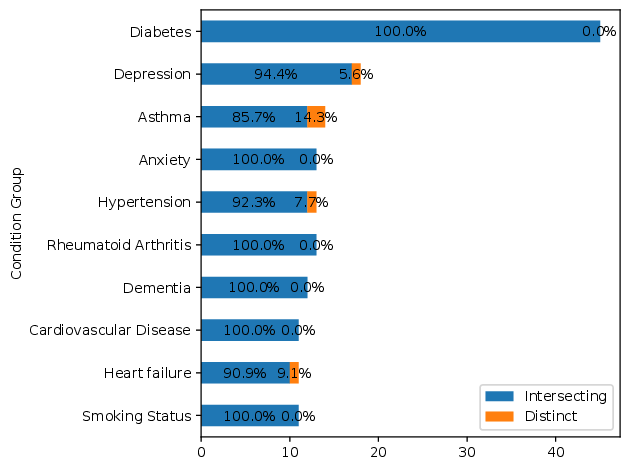

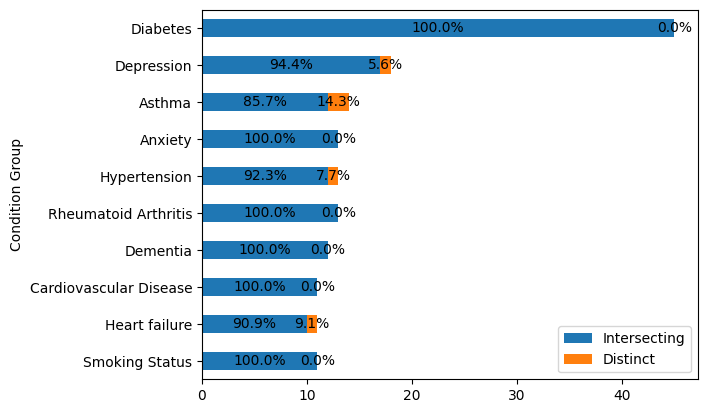

In [433]:
%matplotlib inline
plotIntersectionInLargestGroups()

In [434]:
import matplotlib

matplotlib.use("pgf")
plotIntersectionInLargestGroups()
plt.tight_layout()
plt.savefig('../charts/intersection-in-largest-groups.pgf')